In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('alturas-pesos-mils-train.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
le.fit(df['Genero'])

LabelEncoder()

In [5]:
df['Genero_enc'] = le.transform(df['Genero'])

In [6]:
df['PesoxGenero'] = df['Genero_enc'] * df['Peso']

In [7]:
df

,Unnamed: 0,Genero,Peso,Altura,Genero_enc,PesoxGenero
0,7620,Mujer,61.235,162.402,1,61.235
1,1837,Hombre,97.432,181.908,0,0.000
2,3311,Hombre,73.324,172.459,0,0.000
3,9478,Mujer,55.193,157.748,1,55.193
4,7805,Mujer,56.886,151.798,1,56.886
...,...,...,...,...,...,...
7995,6395,Mujer,62.215,160.083,1,62.215
7996,2714,Hombre,83.840,177.866,0,0.000
7997,3476,Hombre,75.461,170.910,0,0.000
7998,7084,Mujer,65.461,166.137,1,65.461


In [19]:
le.transform(['Mujer'])

array([1])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(df[['Genero_enc', 'Peso', 'PesoxGenero']], df['Altura'])

# lin_reg.fit(df[['Genero_enc', 'Peso']], df['Altura'])

LinearRegression()

In [25]:
lin_reg.coef_, lin_reg.intercept_

(array([ 4.0128233 ,  0.69748132, -0.02224346]), 116.00926819899163)

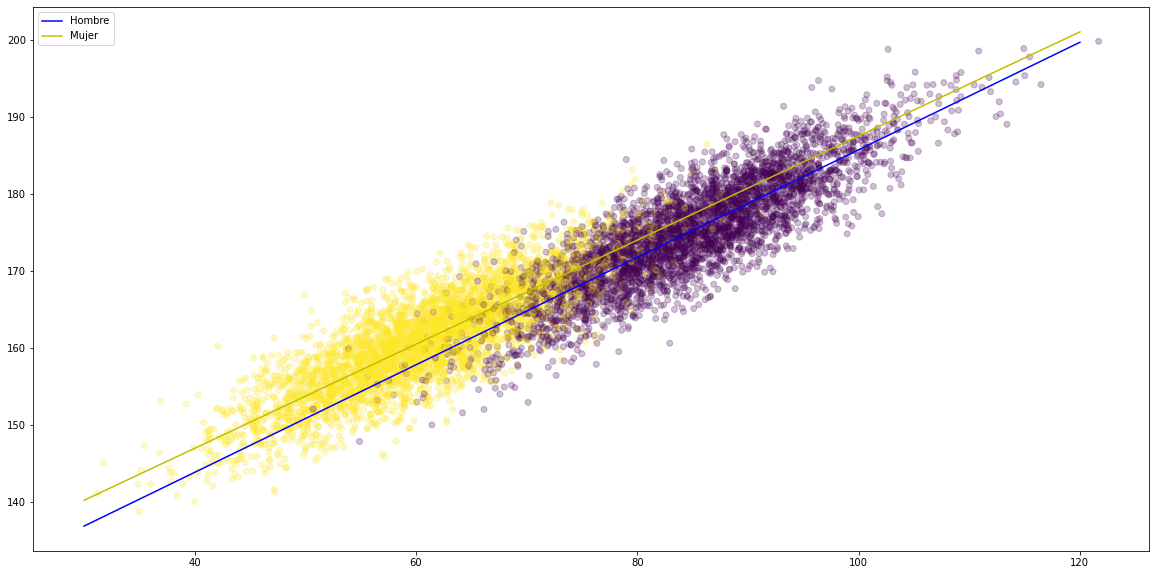

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Peso'], df['Altura'], c=df['Genero_enc'], alpha=0.25)

p = np.linspace(30, 120, 100)


a = lin_reg.coef_[0]*le.transform(['Hombre']) + lin_reg.coef_[1]*p + lin_reg.intercept_ + lin_reg.coef_[2]*p*le.transform(['Hombre'])
plt.plot(p, a, c='b', label='Hombre')


a = lin_reg.coef_[0]*le.transform(['Mujer']) + lin_reg.coef_[1]*p + lin_reg.intercept_ + lin_reg.coef_[2]*p*le.transform(['Mujer'])
plt.plot(p, a, c='y', label='Mujer')

plt.legend()